pyplot
- a sublibrary in matplotlib that provides a convenient interface for creating plots and charts

levenshtein
- computing levenshtein distance, a measure of the difference bet. two strings, defined as the minimum numb. of single-character edits (insertion, deletion,s or substitutions) needed to transfomr one string into the other 
- ex. application: dna seq.

In [2]:
# pip install python-Levenshtein==0.12.0


In [3]:
import pandas as pd
import numpy as np
import scanpy as sc
%matplotlib inline
from matplotlib import pyplot as plt
import Levenshtein
import matplotlib as mpl
import seaborn as sns
# import autoreload
import scipy

params = {
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 10,
    'font.family': "Helvetica",
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 100
   }

mpl.rcParams.update(params)

sns.set_style("ticks")
sns.set_context(context='paper')
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0, "transparent": False}
mpl.rc('savefig', dpi=300)

output_dir='figures/'
output_suffix = ""
output_formats = [".png", ".pdf"]

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20) 
pd.set_option('display.width', 100)

def tissue_colors():
    
    tissue_color_dict = {'Bladder': '#e7969c',
             'Blood': '#d6616b',
             'Bone_Marrow': '#cedb9c',
             'Eye': '#c7ea46',#"#00ff7f",
             'Fat': '#e7cb94',
             'Heart': '#ff0800',
             'Kidney': '#7b4173',
             'Large_Intestine': '#31a354',
             'Liver': '#000080',
             'Lung': '#3182bd',
             'Lymph_Node': '#8c6d31',
             'Mammary':'#ce6dbd',
             'Muscle': '#e7ba52',
             'Pancreas': '#fd8d3c',
             'Prostate':'#637939',#'#a55194',#
             'Salivary_Gland':'#622a0f',
             'Skin': '#de9ed6',
             'Small_Intestine': '#6baed6',
             'Spleen': '#393b79',
             'Thymus': '#9c9ede',
             'Tongue':'#b5cf6b',
             'Trachea': '#969696',
             'Uterus':'#c64b8c',#'#ff0090',
             'Vasculature': '#843c39'}
    return tissue_color_dict

def calculate_v_mu_freq(df):
    df['distance_to_germline_v'] = df.apply(lambda x: Levenshtein.distance(x.v_sequence_alignment, x.v_germline_alignment), axis=1)
    df['v_mu_freq'] = df['distance_to_germline_v'] / df['v_sequence_alignment'].str.len()
    return df

In [4]:
# load the single-cell immune receptor repertoire (scir)
scir = pd.read_table('data/merged_airr_scirpy.tsv')
scir

,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_d_call,IR_VJ_2_d_call,IR_VDJ_1_d_call,IR_VDJ_2_d_call,...,libraryplate,well,notes,seqrun,cell_identifier,n_counts,n_genes,_cell_id,clone_id,clone_id_size
0,False,[],NaN,NaN,NaN,NaN,NaN,NaN,"IGHD2-8*01,IGHD3-3*01,IGHD3-3*02",NaN,...,B133833,J21,Immune,NaN,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_J21_...,489412.0,2103,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_J21_...,0,1
1,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133829,F13,ImmuneLinNeg,NaN,TSP10_Skin_chest_SS2_B134176_B133829_ImmuneLin...,753543.0,1191,TSP10_Skin_chest_SS2_B134176_B133829_ImmuneLin...,1,1
2,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133829,E18,ImmuneLinNeg,NaN,TSP10_Skin_chest_SS2_B134176_B133829_ImmuneLin...,165767.0,1508,TSP10_Skin_chest_SS2_B134176_B133829_ImmuneLin...,2,1
3,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133833,J3,Immune,NaN,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_J3_L002,23780.0,956,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_J3_L002,3,1
4,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD4-17*01,NaN,...,B133831,P18,ImmuneLinPos,NaN,TSP10_Skin_abdomen_SS2_B134173_B133831_ImmuneL...,6611.0,654,TSP10_Skin_abdomen_SS2_B134173_B133831_ImmuneL...,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B134703,D8,Endothelial,NaN,TSP8_Prostate_NA_SS2_B134137_B134703_Endotheli...,844912.0,1705,TSP8_Prostate_NA_SS2_B134137_B134703_Endotheli...,4464,1
5242,False,[],NaN,NaN,NaN,NaN,NaN,NaN,TRBD1*01,NaN,...,B134704,B14,Epithelial,NaN,TSP8_Prostate_NA_SS2_B134140_B134704_Epithelia...,1602157.0,1937,TSP8_Prostate_NA_SS2_B134140_B134704_Epithelia...,4438,10
5243,False,[],NaN,NaN,NaN,NaN,NaN,NaN,TRBD1*01,NaN,...,B134703,B18,Endothelial,NaN,TSP8_Prostate_NA_SS2_B134137_B134703_Endotheli...,2317092.0,2209,TSP8_Prostate_NA_SS2_B134137_B134703_Endotheli...,4436,16
5244,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B134704,D7,Epithelial,NaN,TSP8_Prostate_NA_SS2_B134140_B134704_Epithelia...,655334.0,1788,TSP8_Prostate_NA_SS2_B134140_B134704_Epithelia...,4465,1


In [5]:
type(scir)

pandas.core.frame.DataFrame

In [6]:
# assign the tissue_colors() function to a variable
color_dict = tissue_colors()
color_dict

{'Bladder': '#e7969c',
 'Blood': '#d6616b',
 'Bone_Marrow': '#cedb9c',
 'Eye': '#c7ea46',
 'Fat': '#e7cb94',
 'Heart': '#ff0800',
 'Kidney': '#7b4173',
 'Large_Intestine': '#31a354',
 'Liver': '#000080',
 'Lung': '#3182bd',
 'Lymph_Node': '#8c6d31',
 'Mammary': '#ce6dbd',
 'Muscle': '#e7ba52',
 'Pancreas': '#fd8d3c',
 'Prostate': '#637939',
 'Salivary_Gland': '#622a0f',
 'Skin': '#de9ed6',
 'Small_Intestine': '#6baed6',
 'Spleen': '#393b79',
 'Thymus': '#9c9ede',
 'Tongue': '#b5cf6b',
 'Trachea': '#969696',
 'Uterus': '#c64b8c',
 'Vasculature': '#843c39'}

In [7]:
scir.columns

Index(['multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call',
       'IR_VDJ_2_c_call', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call',
       'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count',
       'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call',
       'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction',
       'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa',
       'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus',
       'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive',
       'IR_VDJ_2_productive', 'IR_VJ_1_sequence', 'IR_VJ_2_sequence', 'IR_VDJ_1_sequence',
       'IR_VDJ_2_sequence', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call',
       'IR_VDJ_2_v_call', 'IR_VJ_1_v_mu_freq', 'IR_VJ_2_v_mu_freq', 'IR_VDJ_1_v_mu_freq',
    

In [8]:
# create a new df to filter the BCR receptor
igh = scir[scir.receptor_type == 'BCR']
igh

,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_d_call,IR_VJ_2_d_call,IR_VDJ_1_d_call,IR_VDJ_2_d_call,...,libraryplate,well,notes,seqrun,cell_identifier,n_counts,n_genes,_cell_id,clone_id,clone_id_size
0,False,[],NaN,NaN,NaN,NaN,NaN,NaN,"IGHD2-8*01,IGHD3-3*01,IGHD3-3*02",NaN,...,B133833,J21,Immune,NaN,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_J21_...,489412.0,2103,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_J21_...,0,1
1,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133829,F13,ImmuneLinNeg,NaN,TSP10_Skin_chest_SS2_B134176_B133829_ImmuneLin...,753543.0,1191,TSP10_Skin_chest_SS2_B134176_B133829_ImmuneLin...,1,1
2,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133829,E18,ImmuneLinNeg,NaN,TSP10_Skin_chest_SS2_B134176_B133829_ImmuneLin...,165767.0,1508,TSP10_Skin_chest_SS2_B134176_B133829_ImmuneLin...,2,1
3,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133833,J3,Immune,NaN,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_J3_L002,23780.0,956,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_J3_L002,3,1
4,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD4-17*01,NaN,...,B133831,P18,ImmuneLinPos,NaN,TSP10_Skin_abdomen_SS2_B134173_B133831_ImmuneL...,6611.0,654,TSP10_Skin_abdomen_SS2_B134173_B133831_ImmuneL...,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B114730,K18,ImmuneLinPos,NaN,TSP7_Spleen_NA_SS2_B134152_B114730_ImmuneLinPo...,424097.0,1695,TSP7_Spleen_NA_SS2_B134152_B114730_ImmuneLinPo...,1519,1
1577,False,[],NaN,NaN,NaN,NaN,NaN,NaN,"IGHD5/OR15-5a*01,IGHD5/OR15-5b*01",NaN,...,B114729,F2,Stromal,NaN,TSP7_Spleen_NA_SS2_B134153_B114729_Stromal_F2_...,78597.0,623,TSP7_Spleen_NA_SS2_B134153_B114729_Stromal_F2_...,1520,1
1578,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD7-27*01,NaN,...,B114749,M8,ImmuneLinNeg,NaN,TSP7_Spleen_NA_SS2_B134166_B114749_ImmuneLinNe...,12709.0,1547,TSP7_Spleen_NA_SS2_B134166_B114749_ImmuneLinNe...,1348,2
1579,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B114748,A3,ImmuneLinPos,NaN,TSP7_Spleen_NA_SS2_B134167_B114748_ImmuneLinPo...,69910.0,759,TSP7_Spleen_NA_SS2_B134167_B114748_ImmuneLinPo...,1521,1


In [9]:
# receptor_type col. of scir df
scir.receptor_type

0       BCR
1       BCR
2       BCR
3       BCR
4       BCR
       ... 
5241    TCR
5242    TCR
5243    TCR
5244    TCR
5245    TCR
Name: receptor_type, Length: 5246, dtype: object

In [10]:
# value_counts of receptor types
scir.receptor_type.value_counts()

receptor_type
TCR           3665
BCR           1539
ambiguous       26
multichain      16
Name: count, dtype: int64

TCR (T-cell receptor): a protein found on the surface of T cells, intiatings an immune response by triggering T cells to produce and attack the foreign invador

In [11]:
# Drop Nans from other chain, effectively only look at heavy chains
igh_filtered = igh.dropna(subset=['IR_VDJ_1_v_mu_freq'])
igh_filtered['IR_VDJ_1_v_mu_freq']

0       0.113712
4       0.056291
6       0.053512
8       0.020408
9       0.020478
          ...   
1573    0.037037
1575    0.064626
1577    0.068259
1578    0.081081
1580    0.064626
Name: IR_VDJ_1_v_mu_freq, Length: 1104, dtype: float64

---
## sampled tissues >2


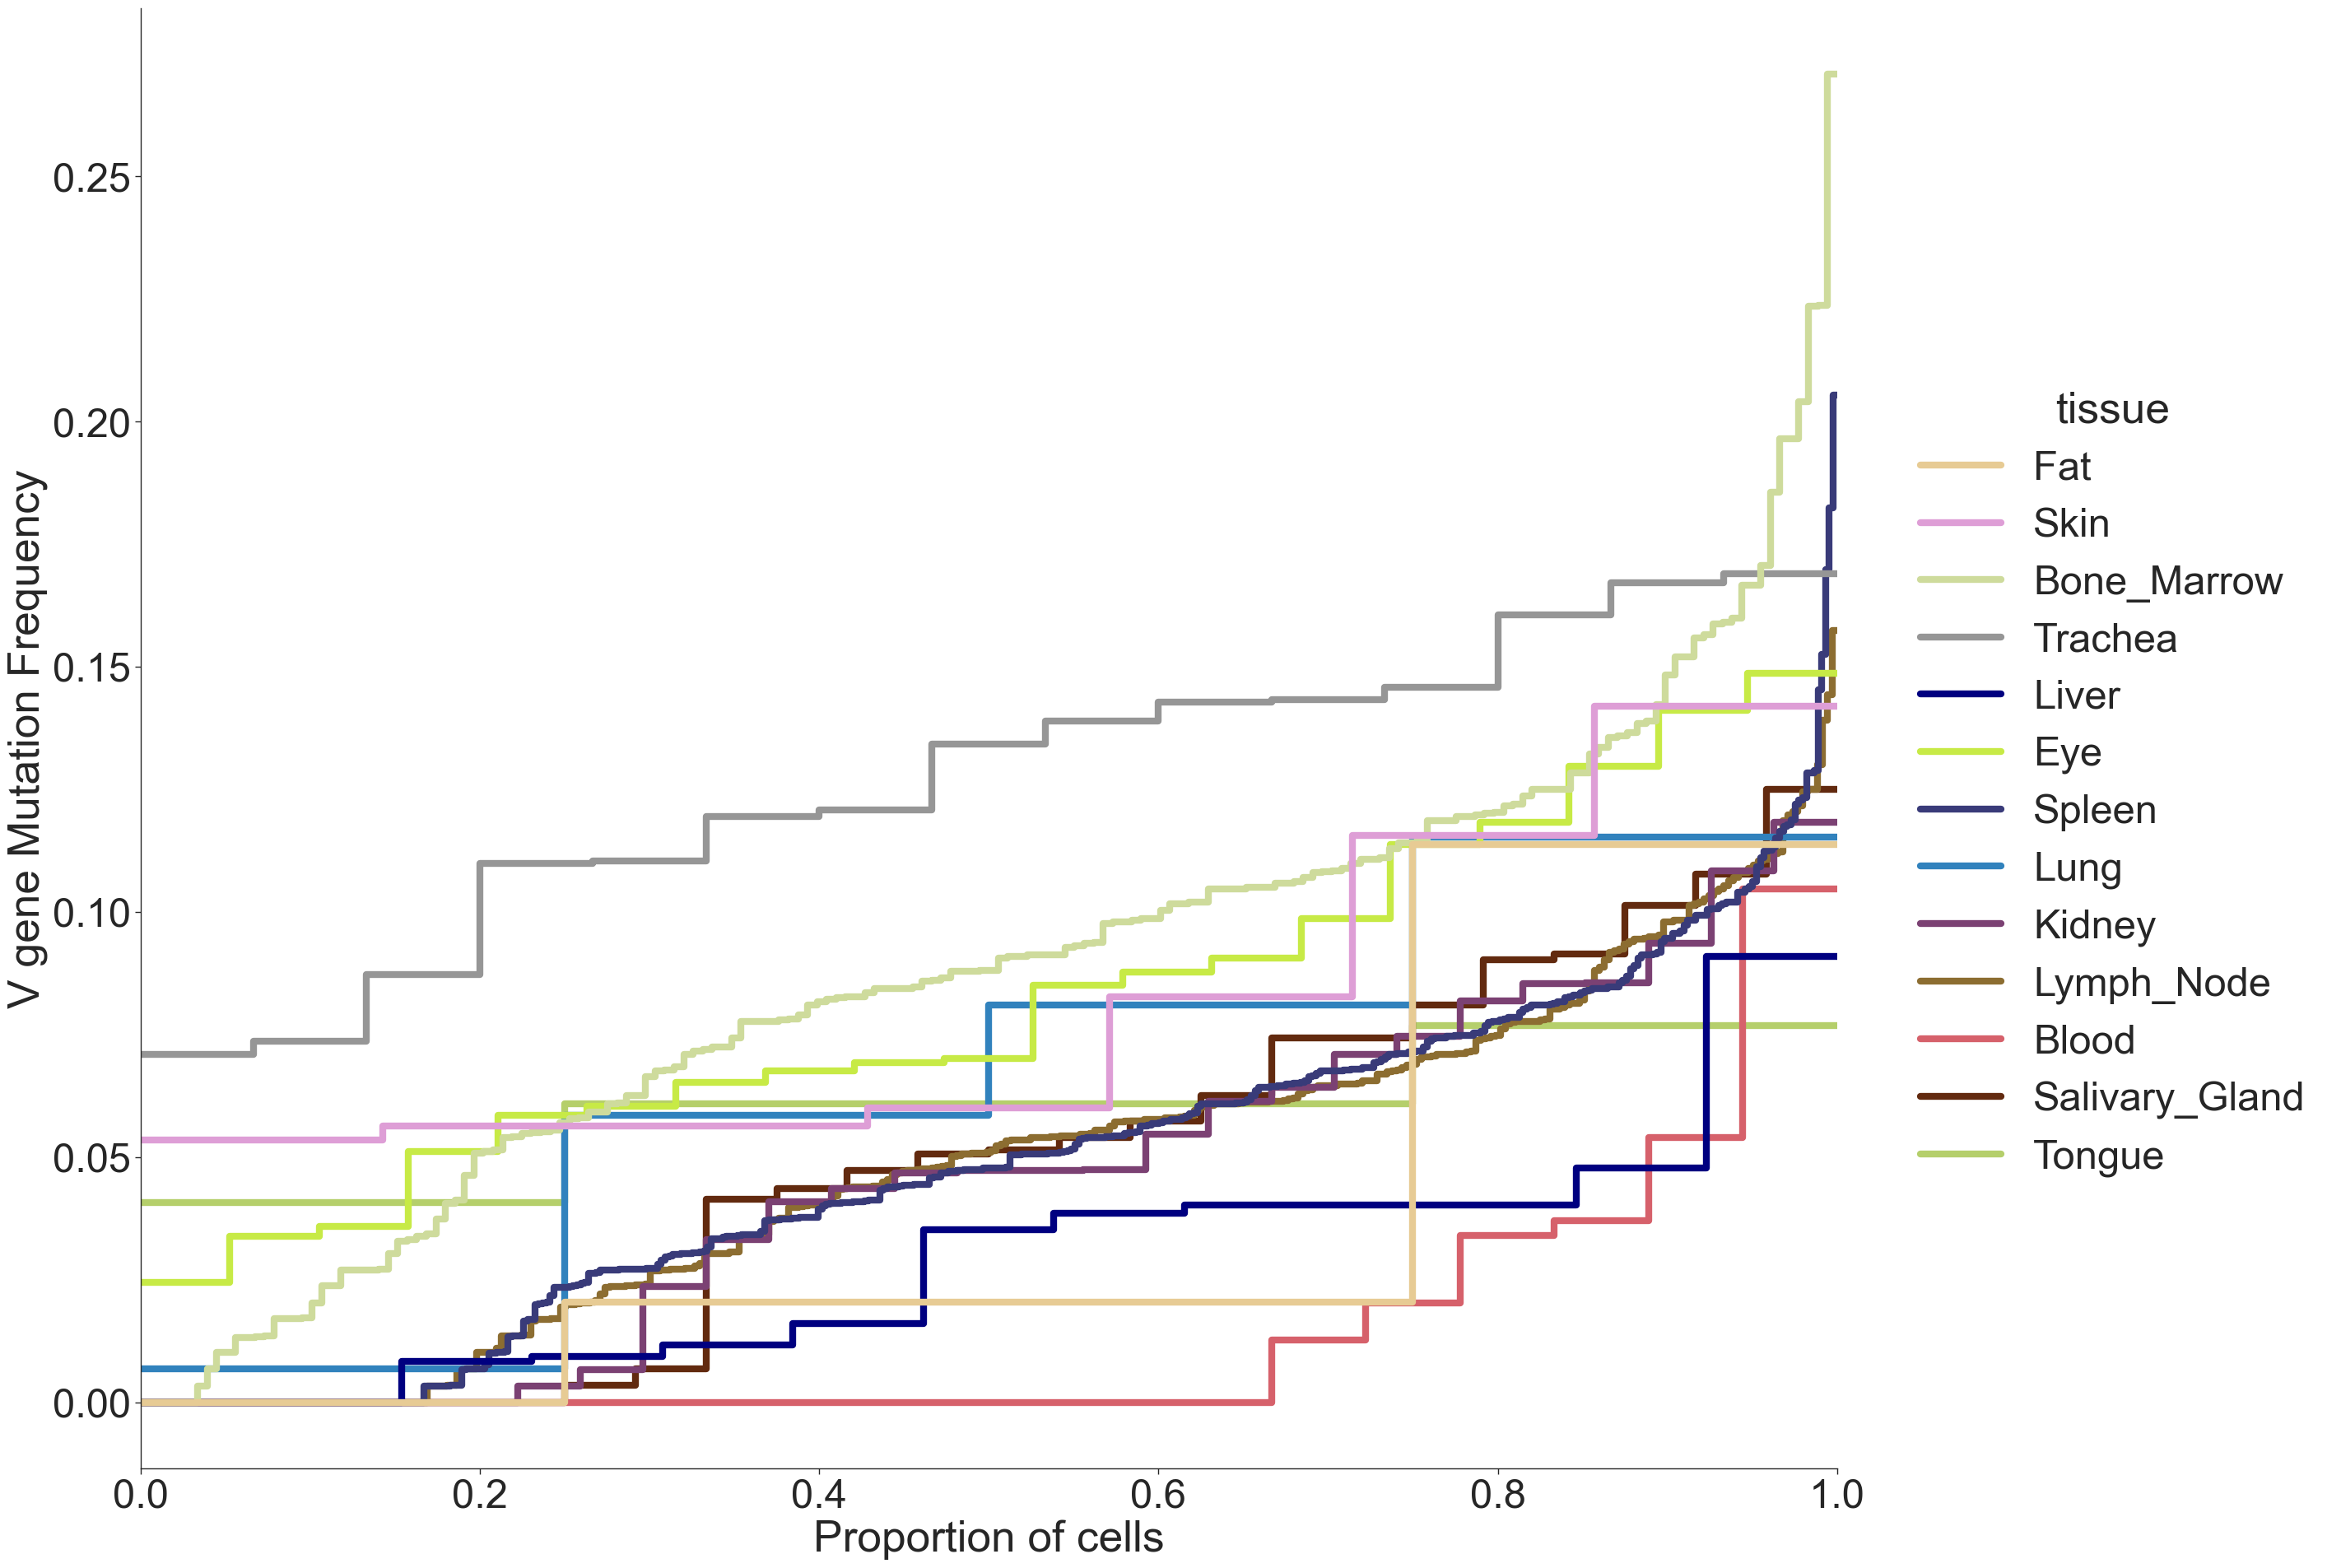

In [12]:
sns.set_context("paper", font_scale=4, rc={"lines.linewidth":6})

hue = 'tissue'
kind = 'ecdf'
x = 'IR_VDJ_1_v_mu_freq'
sel = igh_filtered[hue].value_counts() > 2
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]

g = sns.displot(data, y = data[x], kind=kind, hue=hue, palette=tissue_colors(), height=20, aspect=1.2)

g.set_axis_labels(y_var = 'V gene Mutation Frequency', x_var='Proportion of cells')
g.savefig('{}/{}_{}_{}.pdf'.format(output_dir, x, kind,hue))


'tissue'
- stores the col. name that will be used to group the data by color in the plot

kind = 'ecdf'
- stores the type of plot we want to create
- empirical cumulative distribution function plot

In [13]:
hue = 'tissue'
hue

'tissue'

In [14]:
igh_filtered['tissue']

0              Fat
4             Skin
6             Skin
8              Fat
9              Fat
           ...    
1573        Spleen
1575    Lymph_Node
1577        Spleen
1578        Spleen
1580        Spleen
Name: tissue, Length: 1104, dtype: object

In [15]:
igh_filtered[hue]

0              Fat
4             Skin
6             Skin
8              Fat
9              Fat
           ...    
1573        Spleen
1575    Lymph_Node
1577        Spleen
1578        Spleen
1580        Spleen
Name: tissue, Length: 1104, dtype: object

In [16]:
igh_filtered[hue].value_counts()

tissue
Spleen            443
Lymph_Node        343
Bone_Marrow       178
Kidney             27
Salivary_Gland     24
Eye                19
Blood              18
Trachea            15
Liver              13
Skin                7
Fat                 4
Lung                4
Tongue              4
Prostate            2
Muscle              2
Bladder             1
Name: count, dtype: int64

In [17]:
# set a variable for boolean expression that will be used to filter the dataset 
sel = igh_filtered[hue].value_counts()>2
sel

tissue
Spleen             True
Lymph_Node         True
Bone_Marrow        True
Kidney             True
Salivary_Gland     True
Eye                True
Blood              True
Trachea            True
Liver              True
Skin               True
Fat                True
Lung               True
Tongue             True
Prostate          False
Muscle            False
Bladder           False
Name: count, dtype: bool

In [18]:
type(sel)

pandas.core.series.Series

In [19]:
sel.index

Index(['Spleen', 'Lymph_Node', 'Bone_Marrow', 'Kidney', 'Salivary_Gland', 'Eye', 'Blood',
       'Trachea', 'Liver', 'Skin', 'Fat', 'Lung', 'Tongue', 'Prostate', 'Muscle', 'Bladder'],
      dtype='object', name='tissue')

In [20]:
sel[sel.index]

tissue
Spleen             True
Lymph_Node         True
Bone_Marrow        True
Kidney             True
Salivary_Gland     True
Eye                True
Blood              True
Trachea            True
Liver              True
Skin               True
Fat                True
Lung               True
Tongue             True
Prostate          False
Muscle            False
Bladder           False
Name: count, dtype: bool

In [50]:
sel[sel]

tissue
Spleen            True
Lymph_Node        True
Bone_Marrow       True
Kidney            True
Salivary_Gland    True
Eye               True
Blood             True
Trachea           True
Liver             True
Name: count, dtype: bool

In [49]:
sel[sel].index

Index(['Spleen', 'Lymph_Node', 'Bone_Marrow', 'Kidney', 'Salivary_Gland', 'Eye', 'Blood',
       'Trachea', 'Liver'],
      dtype='object', name='tissue')

In [21]:
# sel. a subset of dataset based on the value counts of the 'hue' col
# the resulting data variable will only contain rows where the value in the selected 'hue'
# col. appears > 2
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]
data

,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_d_call,IR_VJ_2_d_call,IR_VDJ_1_d_call,IR_VDJ_2_d_call,...,libraryplate,well,notes,seqrun,cell_identifier,n_counts,n_genes,_cell_id,clone_id,clone_id_size
0,False,[],NaN,NaN,NaN,NaN,NaN,NaN,"IGHD2-8*01,IGHD3-3*01,IGHD3-3*02",NaN,...,B133833,J21,Immune,NaN,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_J21_...,489412.0,2103,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_J21_...,0,1
4,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD4-17*01,NaN,...,B133831,P18,ImmuneLinPos,NaN,TSP10_Skin_abdomen_SS2_B134173_B133831_ImmuneL...,6611.0,654,TSP10_Skin_abdomen_SS2_B134173_B133831_ImmuneL...,4,2
6,False,[],NaN,NaN,NaN,NaN,NaN,NaN,"IGHD2-2*01,IGHD2-2*02,IGHD2-2*03",NaN,...,B133829,F14,ImmuneLinNeg,NaN,TSP10_Skin_chest_SS2_B134176_B133829_ImmuneLin...,1448608.0,2173,TSP10_Skin_chest_SS2_B134176_B133829_ImmuneLin...,6,1
8,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD6-19*01,NaN,...,B133833,J17,Immune,NaN,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_J17_...,810194.0,1850,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_J17_...,8,1
9,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD4-17*01,NaN,...,B133833,I20,Immune,NaN,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_I20_...,440612.0,1289,TSP10_Fat_SCAT_SS2_B134180_B133833_Immune_I20_...,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD1-1*01,NaN,...,B114730,N16,ImmuneLinPos,NaN,TSP7_Spleen_NA_SS2_B134152_B114730_ImmuneLinPo...,385315.0,1522,TSP7_Spleen_NA_SS2_B134152_B114730_ImmuneLinPo...,1517,1
1575,False,[],NaN,NaN,NaN,NaN,NaN,NaN,"IGHD3-10*01,IGHD3-10*02",NaN,...,B133906,M13,ImmuneLinNeg,NaN,TSP7_LymphNode_inguinal_SS2_B134143_B133906_Im...,489775.0,1711,TSP7_LymphNode_inguinal_SS2_B134143_B133906_Im...,1518,1
1577,False,[],NaN,NaN,NaN,NaN,NaN,NaN,"IGHD5/OR15-5a*01,IGHD5/OR15-5b*01",NaN,...,B114729,F2,Stromal,NaN,TSP7_Spleen_NA_SS2_B134153_B114729_Stromal_F2_...,78597.0,623,TSP7_Spleen_NA_SS2_B134153_B114729_Stromal_F2_...,1520,1
1578,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD7-27*01,NaN,...,B114749,M8,ImmuneLinNeg,NaN,TSP7_Spleen_NA_SS2_B134166_B114749_ImmuneLinNe...,12709.0,1547,TSP7_Spleen_NA_SS2_B134166_B114749_ImmuneLinNe...,1348,2


.isin(sel) 
- won't geneate the same thing as .isin(sel[sel].index)
- no content, ?

In [44]:
data = igh_filtered[igh_filtered[hue].isin(sel)]
data

,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_d_call,IR_VJ_2_d_call,IR_VDJ_1_d_call,IR_VDJ_2_d_call,...,libraryplate,well,notes,seqrun,cell_identifier,n_counts,n_genes,_cell_id,clone_id,clone_id_size


In [22]:
x = 'IR_VDJ_1_v_mu_freq'
y = data[x]
y

0       0.113712
4       0.056291
6       0.053512
8       0.020408
9       0.020478
          ...   
1573    0.037037
1575    0.064626
1577    0.068259
1578    0.081081
1580    0.064626
Name: IR_VDJ_1_v_mu_freq, Length: 1099, dtype: float64

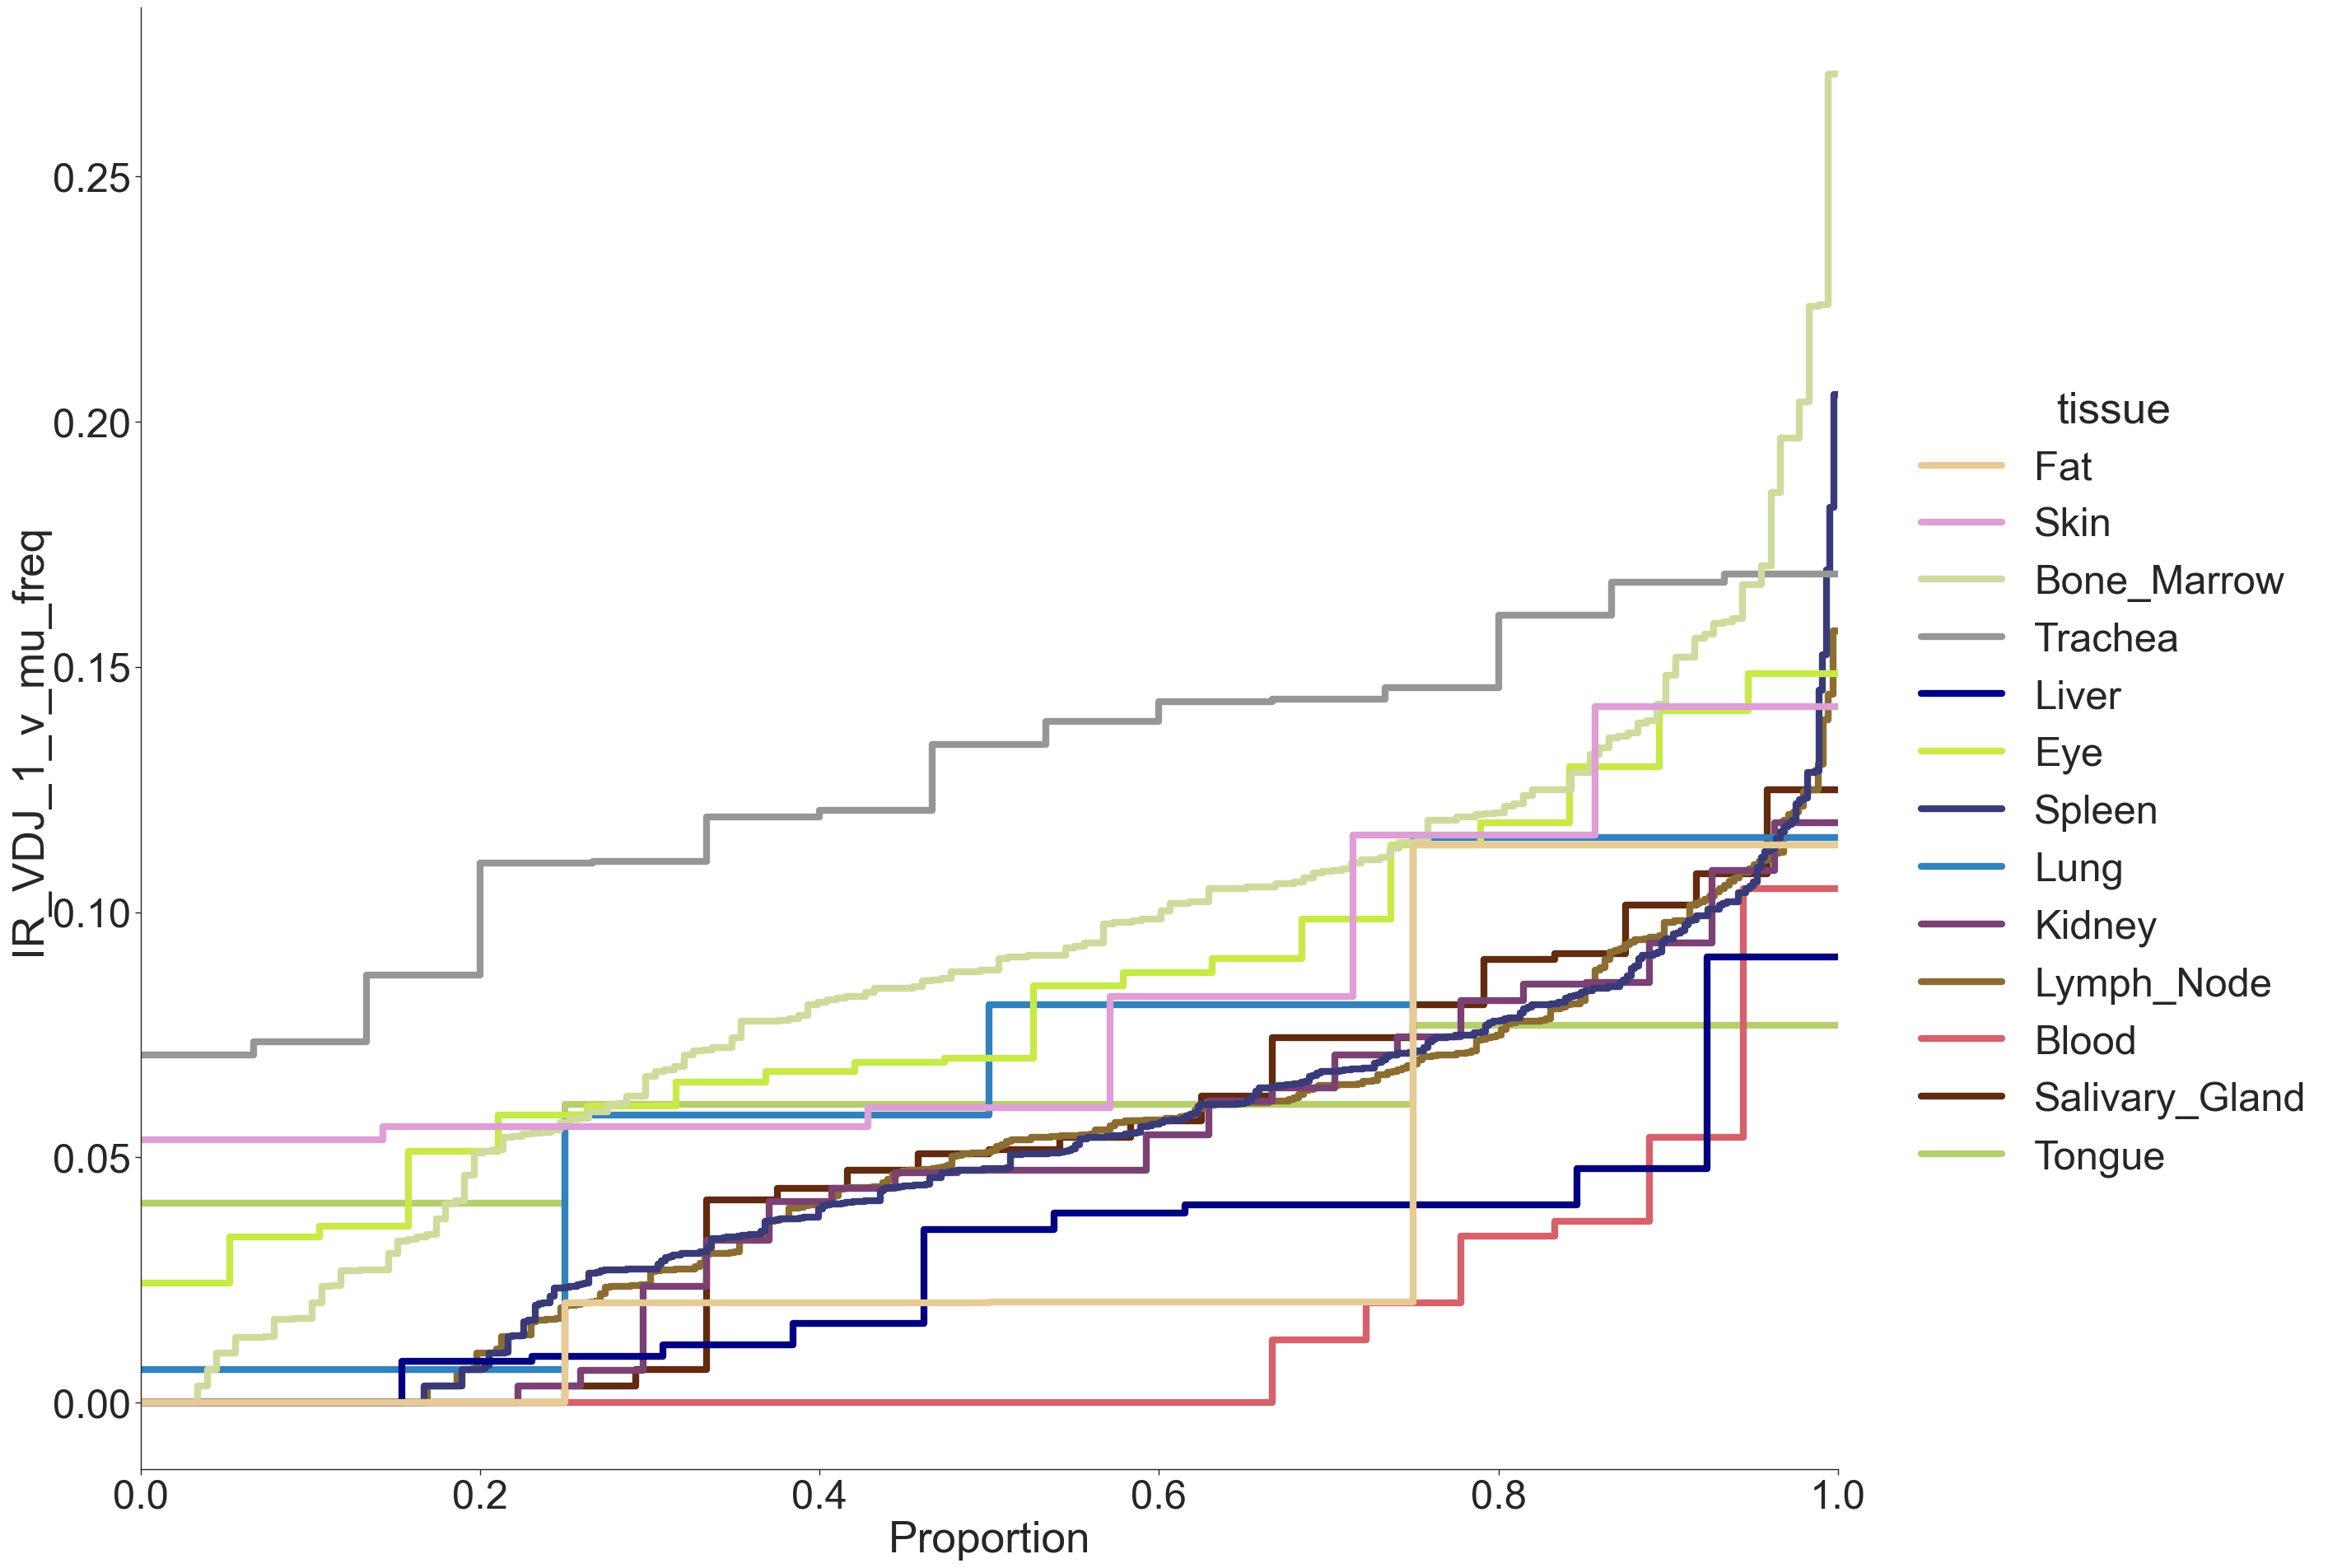

In [23]:
g = sns.displot(data, y = data[x], kind=kind, hue=hue, palette=tissue_colors(), height=20, aspect=1.2)
g


## highly sampled tissues

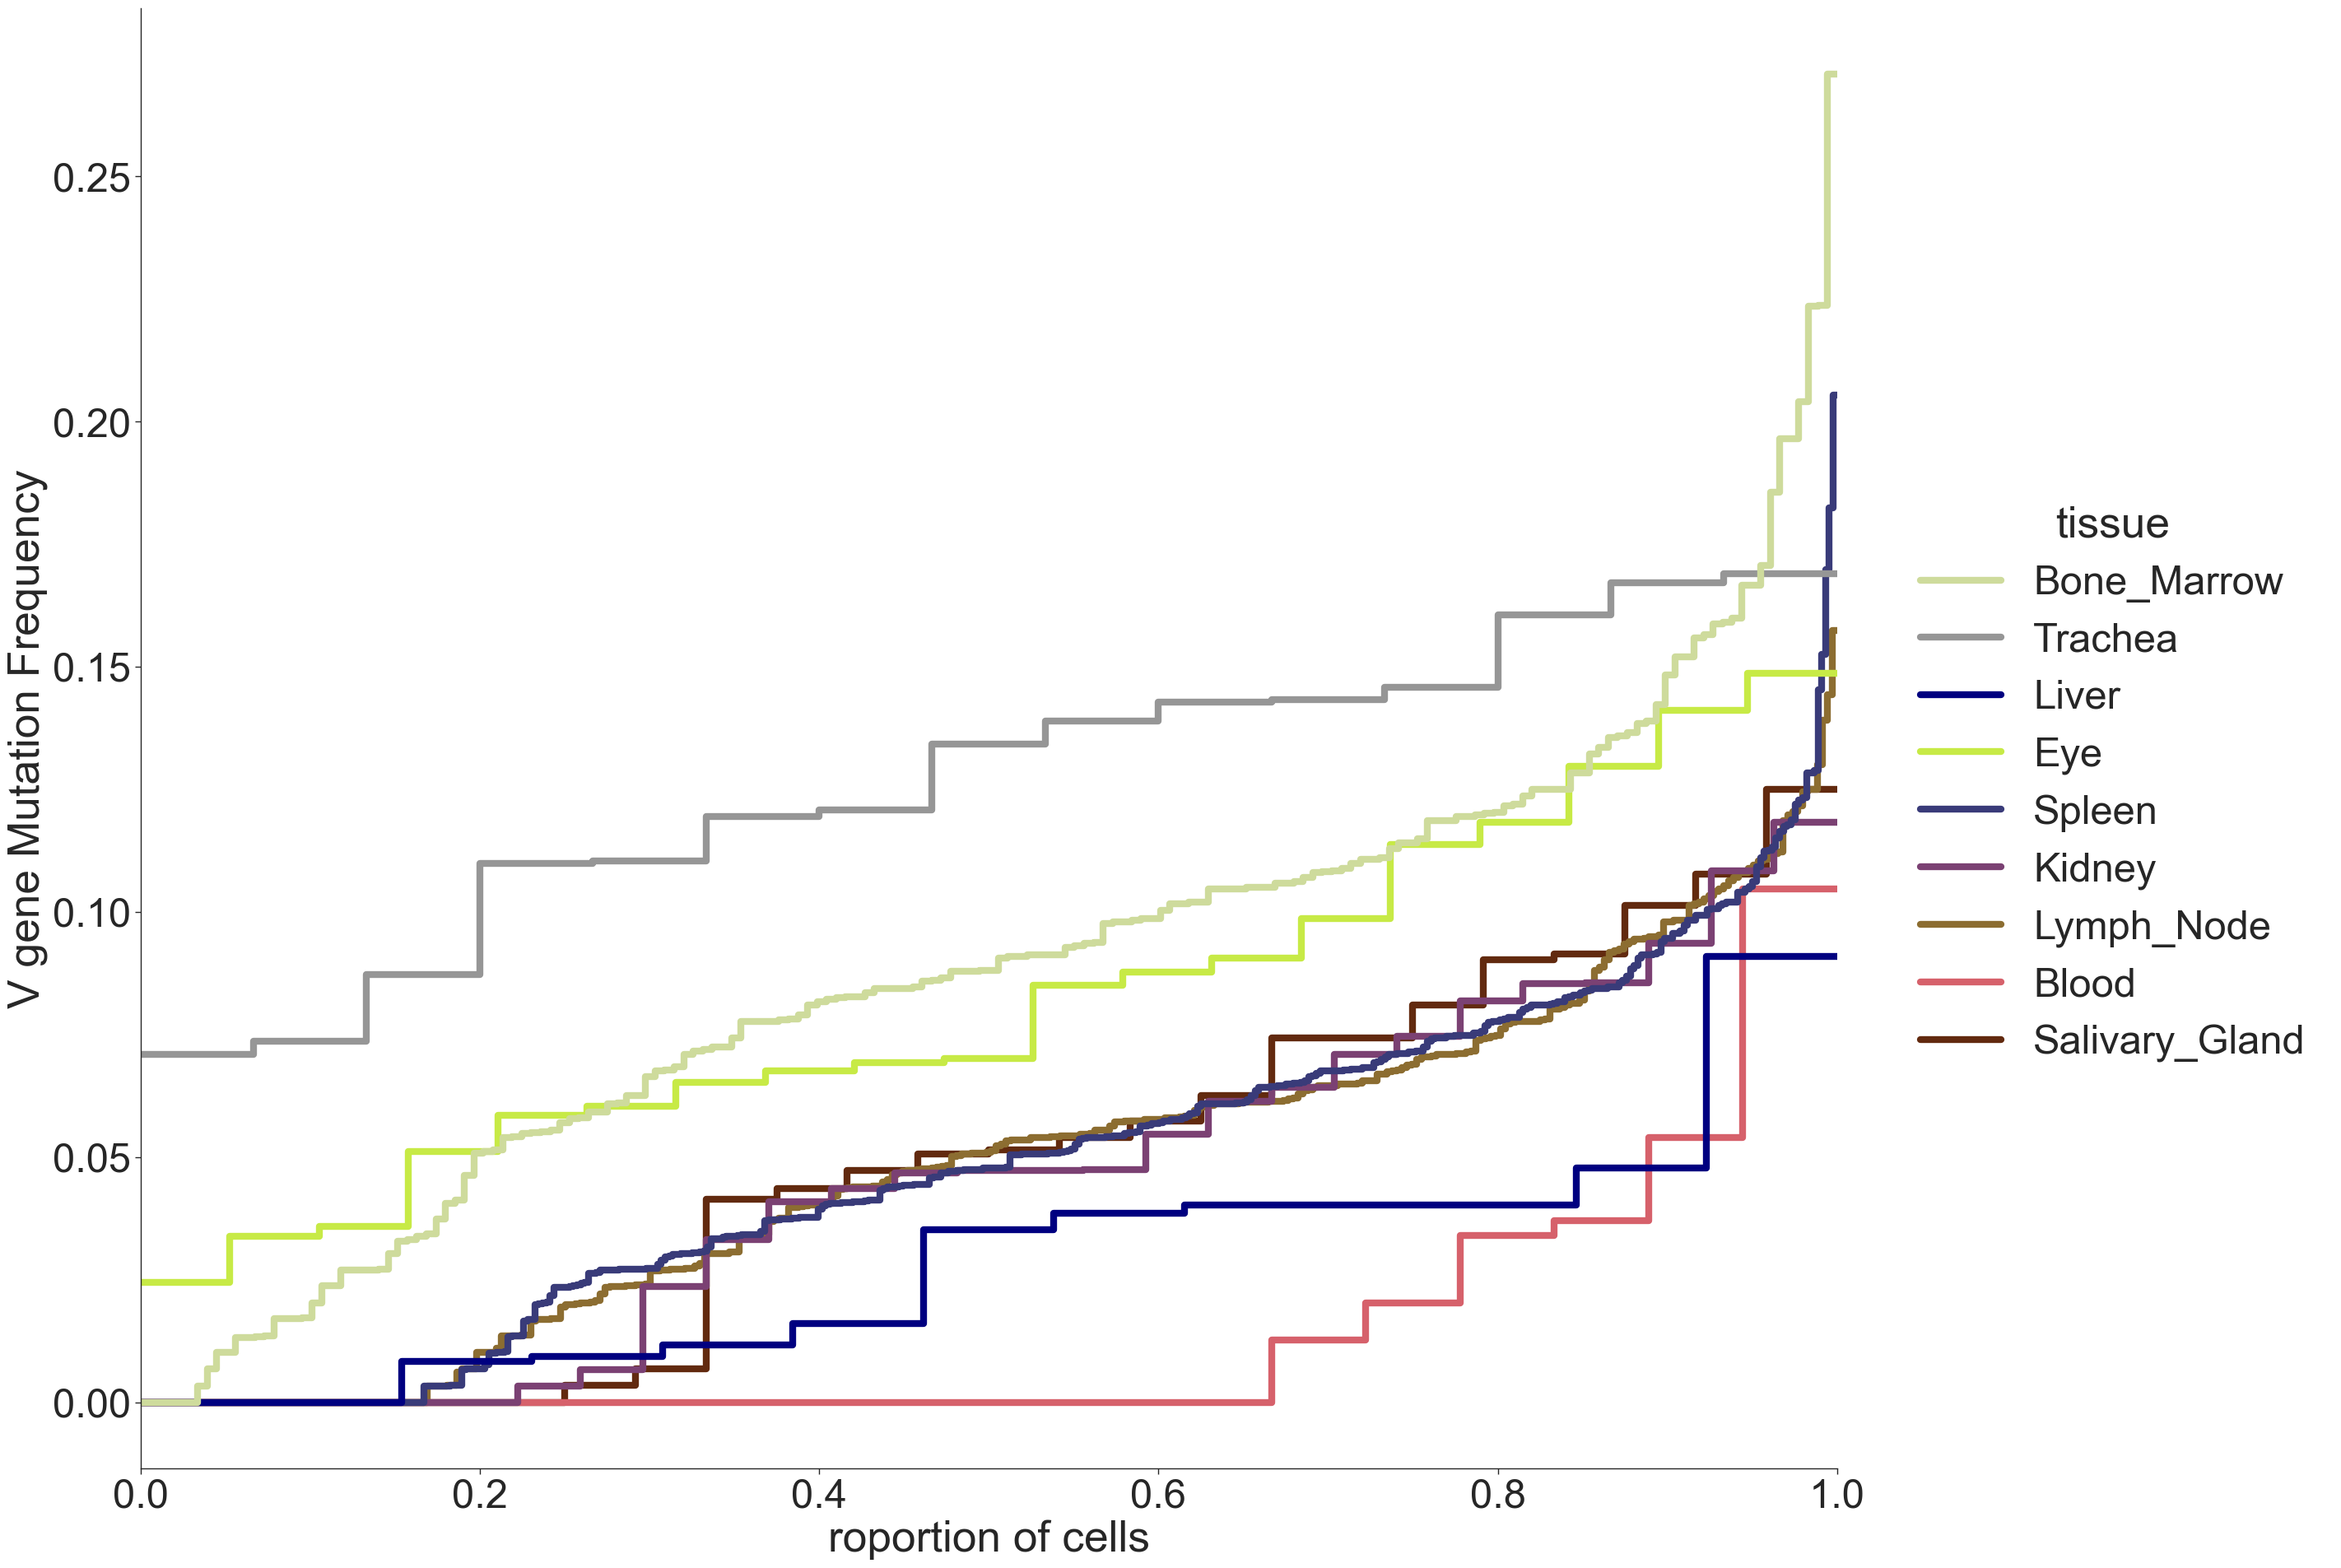

In [45]:
# look at highly sampled tissues

sns.set_context("paper", font_scale=4, rc={"lines.linewidth":6})
hue = 'tissue'
kind = 'ecdf'
x = 'IR_VDJ_1_v_mu_freq'
sel = igh_filtered[hue].value_counts() > 10
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]

g = sns.displot(data, y = data[x], kind=kind, hue=hue, palette=tissue_colors(), height=20, aspect=1.2)

g.set_axis_labels(y_var = 'V gene Mutation Frequency', x_var='Proportion of cells')
g.savefig('{}/{}_{}_{}.pdf'.format(output_dir, x, kind,hue))


## hyper mutation by cell ontology class

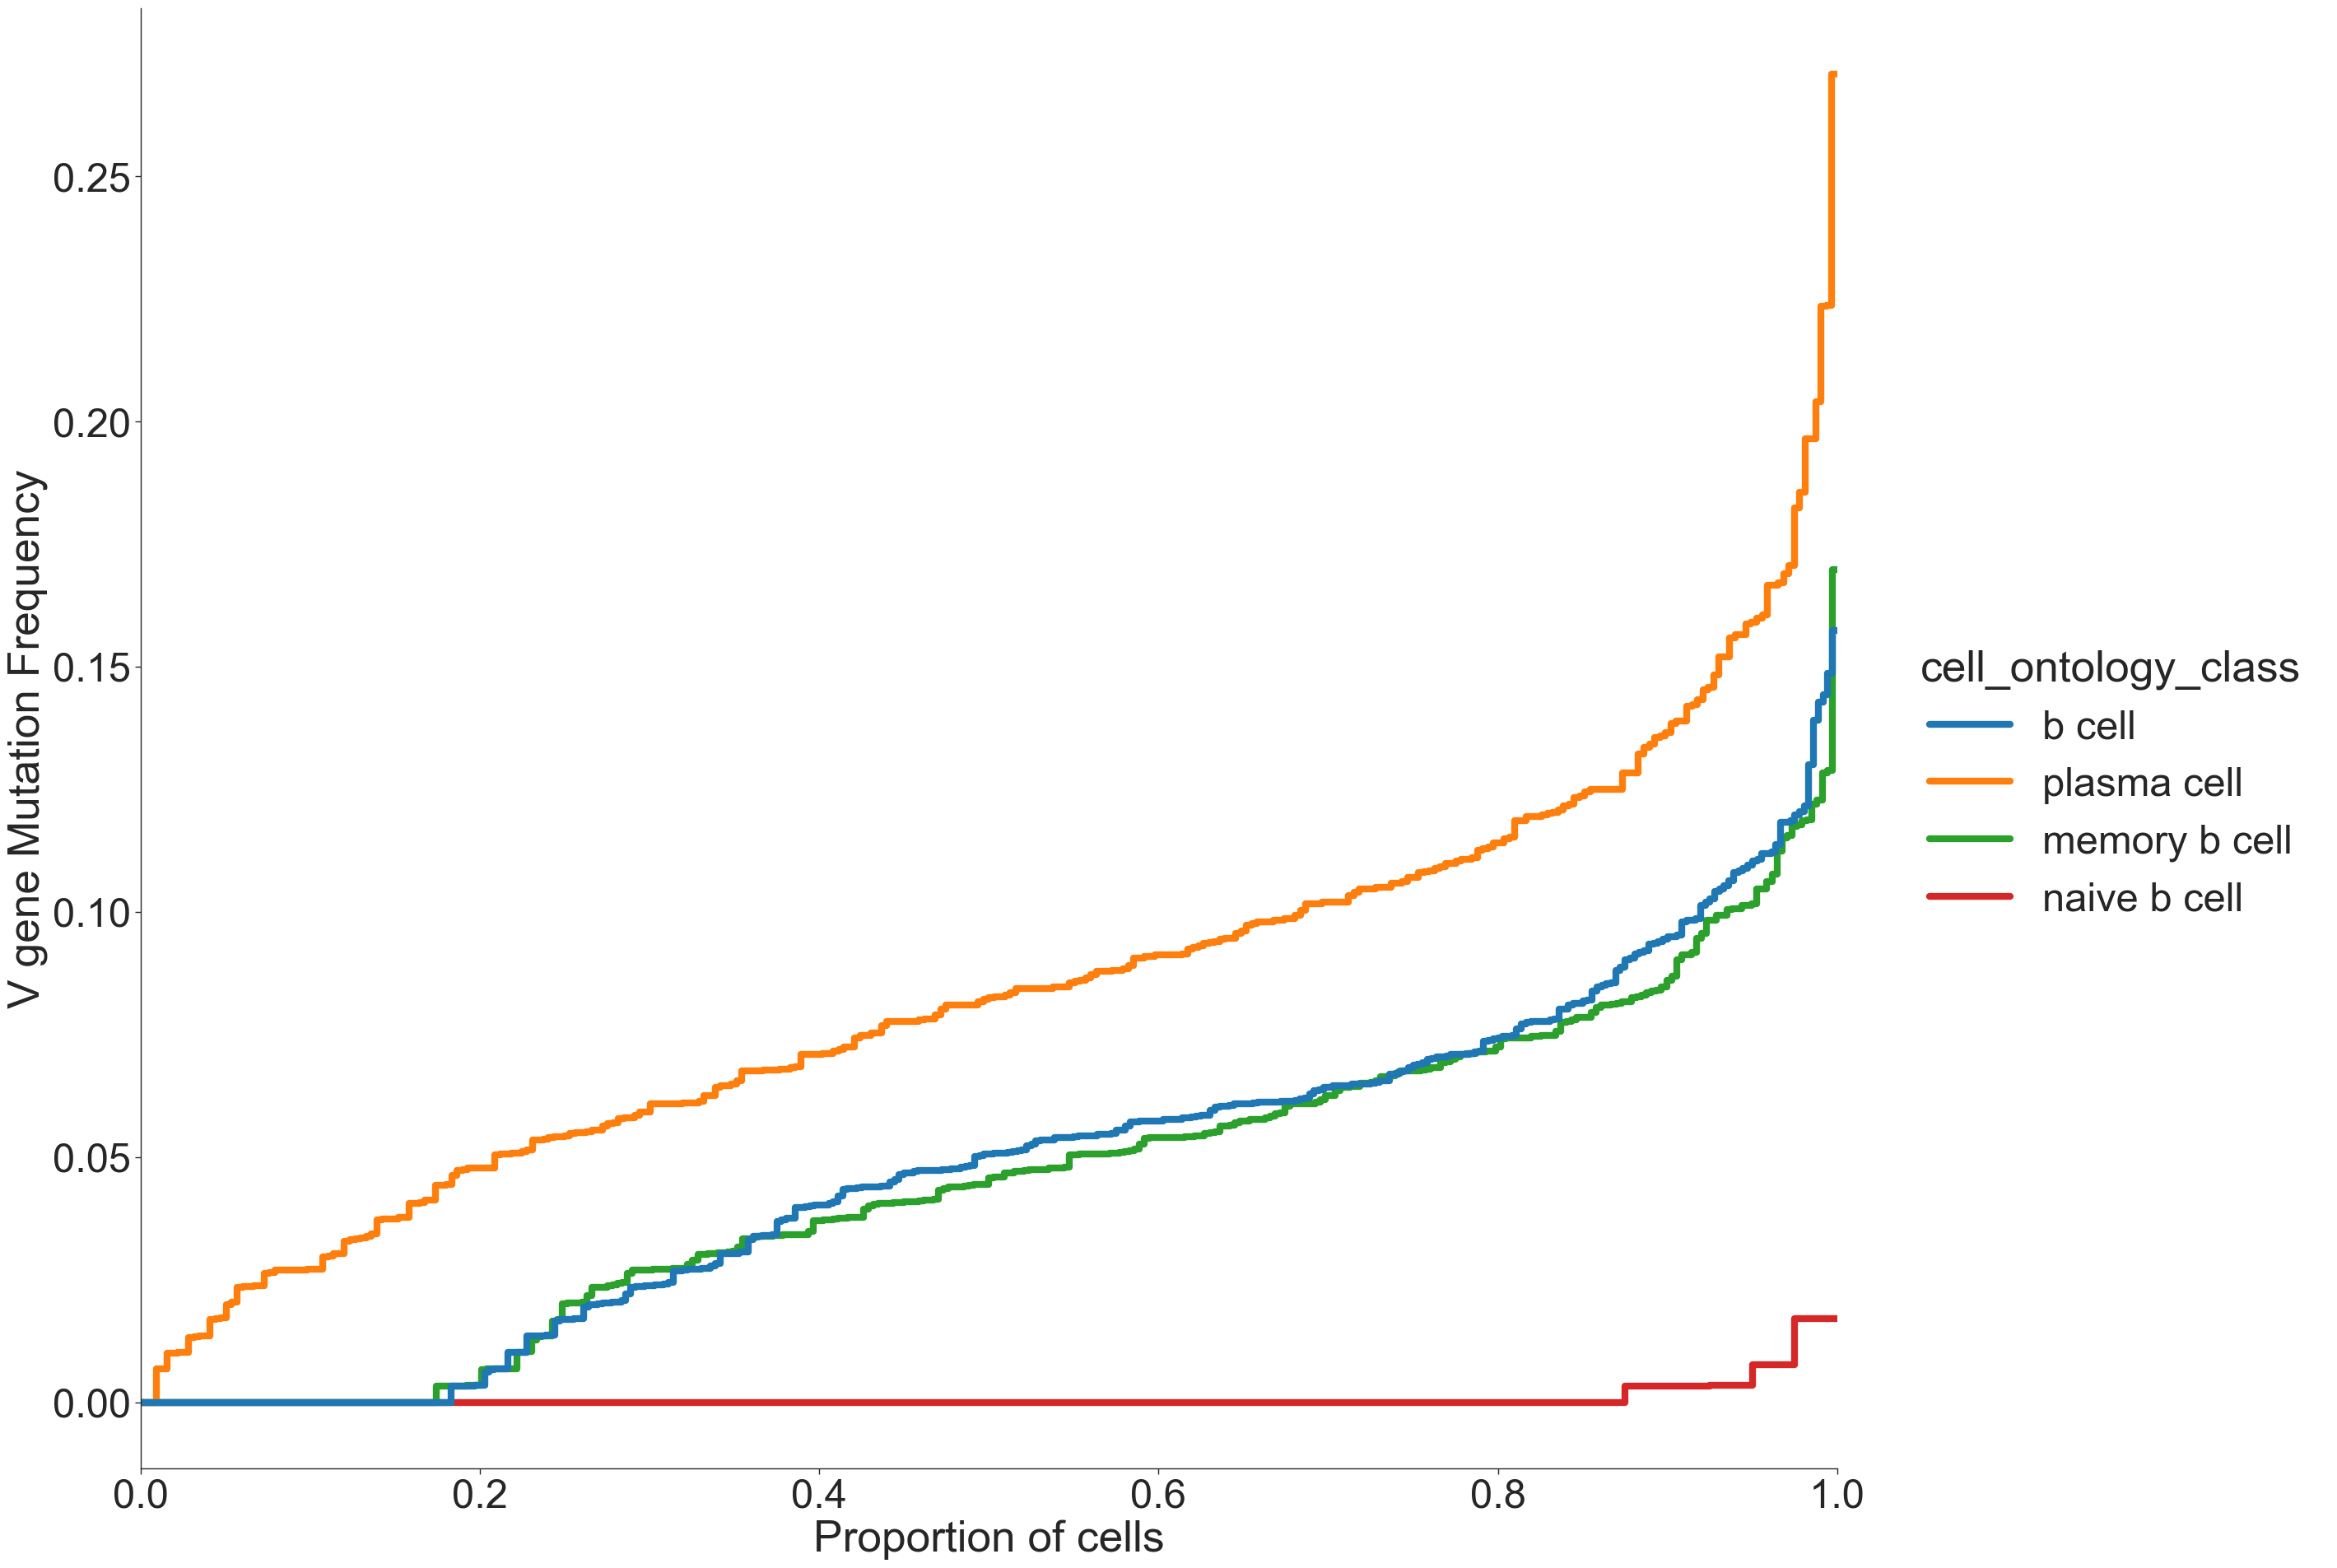

In [25]:
cell_label = 'cell_ontology_class'
bcell_filter = 'b cell|plasma cell'
hue = cell_label
kind = 'ecdf'
mu_freq = 'v_mu_freq'
sel = igh_filtered[hue].value_counts() > 5
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]
data = data[data[cell_label].str.contains(bcell_filter)]
g = sns.displot(data, y = data[x], kind=kind, hue=hue, height=20, aspect=1.2)

g.savefig('{}/{}_{}_{}.pdf'.format(output_dir, x, kind,hue))
g.set_axis_labels(y_var = 'V gene Mutation Frequency', x_var='Proportion of cells')

In [34]:
# calculate means
col = 'cell_ontology_class'
mu_freq = 'IR_VDJ_1_v_mu_freq'
for val in igh[col].unique():
    temp_df = igh[igh[col] == val]
    print('{} {} {}'.format(val, "v-mutation-frequency", temp_df[mu_freq].mean()))

b cell v-mutation-frequency 0.04726423907117575
memory b cell v-mutation-frequency 0.04501850743424698
mast cell v-mutation-frequency 0.06952500570906595
plasma cell v-mutation-frequency 0.0832974948377925
endothelial cell v-mutation-frequency 0.0600706713780918
plasmablast v-mutation-frequency 0.015147919632969398
naive b cell v-mutation-frequency 0.0008734513406905373
cd8-positive, alpha-beta t cell v-mutation-frequency 0.09739542467158158
neutrophil v-mutation-frequency 0.02396540296963111
classical monocyte v-mutation-frequency 0.06920740841593408
macrophage v-mutation-frequency 0.0812286511319549
monocyte v-mutation-frequency nan
fibroblast v-mutation-frequency 0.08431208053691275
nk cell v-mutation-frequency nan
lacrimal gland functional unit cell v-mutation-frequency 0.08564567059700104
t cell v-mutation-frequency nan
platelet v-mutation-frequency nan
cd8-positive, alpha-beta memory t cell v-mutation-frequency 0.10949996679157319
skeletal muscle satellite stem cell v-mutation-fr

In [35]:
# cell_ontology_class col.
igh[col]

0              b cell
1       memory b cell
2       memory b cell
3              b cell
4           mast cell
            ...      
1576    memory b cell
1577      plasma cell
1578      plasma cell
1579    memory b cell
1580      plasma cell
Name: cell_ontology_class, Length: 1539, dtype: object

In [36]:
# unique cell_ontology_class
igh[col].unique()

array(['b cell', 'memory b cell', 'mast cell', 'plasma cell',
       'endothelial cell', 'plasmablast', 'naive b cell',
       'cd8-positive, alpha-beta t cell', 'neutrophil',
       'classical monocyte', 'macrophage', 'monocyte', 'fibroblast',
       'nk cell', 'lacrimal gland functional unit cell', 't cell',
       'platelet', 'cd8-positive, alpha-beta memory t cell',
       'skeletal muscle satellite stem cell',
       'naive thymus-derived cd8-positive, alpha-beta t cell',
       'microglial cell', 'cd4-positive, alpha-beta t cell',
       'hematopoietic stem cell', 'immune cell', 'low quality',
       'innate lymphoid cell', 'type i nk t cell',
       'cd4-positive, alpha-beta memory t cell', 'keratinocyte',
       'basal cell'], dtype=object)

In [46]:
temp_df = igh[igh[col] == val]
temp_df
       

,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_d_call,IR_VJ_2_d_call,IR_VDJ_1_d_call,IR_VDJ_2_d_call,...,libraryplate,well,notes,seqrun,cell_identifier,n_counts,n_genes,_cell_id,clone_id,clone_id_size
634,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133901,P6,Immune,NaN,TSP7_Tongue_anterior_SS2_B134164_B133901_Immun...,63954.0,926,TSP7_Tongue_anterior_SS2_B134164_B133901_Immun...,598,1
687,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD2-8*01,NaN,...,B133919,H16,Endothelial,NaN,TSP7_Tongue_posterior_SS2_B134145_B133919_Endo...,795070.0,1945,TSP7_Tongue_posterior_SS2_B134145_B133919_Endo...,650,1
887,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133901,A20,Immune,NaN,TSP7_Tongue_posterior_SS2_B134164_B133901_Immu...,157682.0,1127,TSP7_Tongue_posterior_SS2_B134164_B133901_Immu...,848,1
896,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133919,K12,Endothelial,NaN,TSP7_Tongue_anterior_SS2_B134145_B133919_Endot...,901306.0,2911,TSP7_Tongue_anterior_SS2_B134145_B133919_Endot...,857,1
1064,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD6-6*01,NaN,...,B133901,D10,Immune,NaN,TSP7_Tongue_anterior_SS2_B134164_B133901_Immun...,134781.0,1473,TSP7_Tongue_anterior_SS2_B134164_B133901_Immun...,1024,1
1216,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD1-26*01,NaN,...,B133919,C1,Endothelial,NaN,TSP7_Tongue_anterior_SS2_B134145_B133919_Endot...,260422.0,1211,TSP7_Tongue_anterior_SS2_B134145_B133919_Endot...,1173,1
1343,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133911,J10,Stromal,NaN,TSP7_Tongue_anterior_SS2_B134144_B133911_Strom...,24723.0,206,TSP7_Tongue_anterior_SS2_B134144_B133911_Strom...,1297,1
1462,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133911,D7,Stromal,NaN,TSP7_Tongue_anterior_SS2_B134144_B133911_Strom...,36414.0,231,TSP7_Tongue_anterior_SS2_B134144_B133911_Strom...,1411,1
1484,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133901,L8,Immune,NaN,TSP7_Tongue_anterior_SS2_B134164_B133901_Immun...,46522.0,999,TSP7_Tongue_anterior_SS2_B134164_B133901_Immun...,1431,1
1492,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133700,F9,Epithelial,NaN,TSP7_Tongue_anterior_SS2_B134165_B133700_Epith...,2169994.0,4574,TSP7_Tongue_anterior_SS2_B134165_B133700_Epith...,1439,1


In [38]:
# calculate means
col = 'tissue'
mu_freq = 'IR_VDJ_1_v_mu_freq'
for val in igh[col].unique():
    temp_df = igh[igh[col] == val]
    print('{} {} {}'.format(val, "v-mutation-frequency", temp_df[mu_freq].mean()))

Fat v-mutation-frequency 0.03864958838672612
Skin v-mutation-frequency 0.08092313280080177
Bone_Marrow v-mutation-frequency 0.08804851408031882
Prostate v-mutation-frequency 0.0884353741496598
Trachea v-mutation-frequency 0.1262765984514573
Liver v-mutation-frequency 0.029160438642491293
Eye v-mutation-frequency 0.08158012194894823
Bladder v-mutation-frequency 0.1566265060240964
Spleen v-mutation-frequency 0.04851828171231013
Lung v-mutation-frequency 0.06543968227820608
Kidney v-mutation-frequency 0.04589653645911683
Muscle v-mutation-frequency 0.08492225101814141
Lymph_Node v-mutation-frequency 0.04817580864389892
Blood v-mutation-frequency 0.014606236823168313
Salivary_Gland v-mutation-frequency 0.04851497413432351
Tongue v-mutation-frequency 0.059805666161598346


In [39]:
temp_df

,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_d_call,IR_VJ_2_d_call,IR_VDJ_1_d_call,IR_VDJ_2_d_call,...,libraryplate,well,notes,seqrun,cell_identifier,n_counts,n_genes,_cell_id,clone_id,clone_id_size
634,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133901,P6,Immune,NaN,TSP7_Tongue_anterior_SS2_B134164_B133901_Immun...,63954.0,926,TSP7_Tongue_anterior_SS2_B134164_B133901_Immun...,598,1
687,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD2-8*01,NaN,...,B133919,H16,Endothelial,NaN,TSP7_Tongue_posterior_SS2_B134145_B133919_Endo...,795070.0,1945,TSP7_Tongue_posterior_SS2_B134145_B133919_Endo...,650,1
887,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133901,A20,Immune,NaN,TSP7_Tongue_posterior_SS2_B134164_B133901_Immu...,157682.0,1127,TSP7_Tongue_posterior_SS2_B134164_B133901_Immu...,848,1
896,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133919,K12,Endothelial,NaN,TSP7_Tongue_anterior_SS2_B134145_B133919_Endot...,901306.0,2911,TSP7_Tongue_anterior_SS2_B134145_B133919_Endot...,857,1
1064,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD6-6*01,NaN,...,B133901,D10,Immune,NaN,TSP7_Tongue_anterior_SS2_B134164_B133901_Immun...,134781.0,1473,TSP7_Tongue_anterior_SS2_B134164_B133901_Immun...,1024,1
1216,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD1-26*01,NaN,...,B133919,C1,Endothelial,NaN,TSP7_Tongue_anterior_SS2_B134145_B133919_Endot...,260422.0,1211,TSP7_Tongue_anterior_SS2_B134145_B133919_Endot...,1173,1
1343,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133911,J10,Stromal,NaN,TSP7_Tongue_anterior_SS2_B134144_B133911_Strom...,24723.0,206,TSP7_Tongue_anterior_SS2_B134144_B133911_Strom...,1297,1
1462,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133911,D7,Stromal,NaN,TSP7_Tongue_anterior_SS2_B134144_B133911_Strom...,36414.0,231,TSP7_Tongue_anterior_SS2_B134144_B133911_Strom...,1411,1
1484,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133901,L8,Immune,NaN,TSP7_Tongue_anterior_SS2_B134164_B133901_Immun...,46522.0,999,TSP7_Tongue_anterior_SS2_B134164_B133901_Immun...,1431,1
1492,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133700,F9,Epithelial,NaN,TSP7_Tongue_anterior_SS2_B134165_B133700_Epith...,2169994.0,4574,TSP7_Tongue_anterior_SS2_B134165_B133700_Epith...,1439,1


In [40]:
temp_df[mu_freq]

634          NaN
687     0.040678
887          NaN
896          NaN
1064    0.060811
1216    0.060811
1343         NaN
1462         NaN
1484         NaN
1492         NaN
1528         NaN
1571    0.076923
Name: IR_VDJ_1_v_mu_freq, dtype: float64

In [41]:
temp_df[mu_freq].mean()

0.059805666161598346

---

In [42]:
igh[igh.tissue == 'Blood']

,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_d_call,IR_VJ_2_d_call,IR_VDJ_1_d_call,IR_VDJ_2_d_call,...,libraryplate,well,notes,seqrun,cell_identifier,n_counts,n_genes,_cell_id,clone_id,clone_id_size
591,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133902,L7,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_L...,204715.0,1216,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_L...,556,1
606,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133902,M14,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_M...,29133.0,507,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_M...,571,1
612,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD5-12*01,NaN,...,B133902,D15,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_D...,292434.0,1342,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_D...,577,1
616,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD3-10*01,NaN,...,B133902,N14,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_N...,336430.0,1505,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_N...,581,1
625,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133902,F2,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_F...,170246.0,1108,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_F...,590,1
648,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133902,O14,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_O...,268608.0,1320,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_O...,611,1
696,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD3-22*01,NaN,...,B133902,K17,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_K...,527421.0,1445,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_K...,659,1
697,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD2-15*01,NaN,...,B133902,D17,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_D...,678439.0,1509,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_D...,660,1
715,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133902,H2,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_H...,5044.0,229,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_H...,678,1
741,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B133902,P5,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_P...,88251.0,961,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_P...,704,1


In [47]:
igh[igh.tissue == 'Blood'].mean()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [48]:
# Drop Nans from other chain, effectively only look at heavy chains
igh_filtered = igh.dropna(subset=['IR_VDJ_1_v_mu_freq'])
igh_filtered['IR_VDJ_1_v_mu_freq']

0       0.113712
4       0.056291
6       0.053512
8       0.020408
9       0.020478
          ...   
1573    0.037037
1575    0.064626
1577    0.068259
1578    0.081081
1580    0.064626
Name: IR_VDJ_1_v_mu_freq, Length: 1104, dtype: float64

In [ ]:
igh_filtered['IR_VDJ_1_v_mu_freq'].mean()

0.056073963066639594

In [ ]:
igh['IR_VDJ_1_v_mu_freq']

0       0.113712
1            NaN
2            NaN
3            NaN
4       0.056291
          ...   
1576         NaN
1577    0.068259
1578    0.081081
1579         NaN
1580    0.064626
Name: IR_VDJ_1_v_mu_freq, Length: 1539, dtype: float64

In [ ]:
igh_filtered[igh_filtered.tissue == 'Blood']

,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_d_call,IR_VJ_2_d_call,IR_VDJ_1_d_call,IR_VDJ_2_d_call,...,libraryplate,well,notes,seqrun,cell_identifier,n_counts,n_genes,_cell_id,clone_id,clone_id_size
612,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD5-12*01,NaN,...,B133902,D15,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_D...,292434.0,1342,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_D...,577,1
616,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD3-10*01,NaN,...,B133902,N14,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_N...,336430.0,1505,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_N...,581,1
696,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD3-22*01,NaN,...,B133902,K17,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_K...,527421.0,1445,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_K...,659,1
697,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD2-15*01,NaN,...,B133902,D17,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_D...,678439.0,1509,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_D...,660,1
747,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD4-17*01,NaN,...,B133902,F21,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_F...,448520.0,1367,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_F...,710,1
759,False,[],NaN,NaN,NaN,NaN,NaN,NaN,"IGHD3/OR15-3a*01,IGHD3/OR15-3b*01",NaN,...,B133902,H7,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_H...,660856.0,1737,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_H...,722,1
765,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD3-10*01,NaN,...,B133902,L12,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_L...,415639.0,1493,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_L...,728,1
835,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD6-19*01,NaN,...,B133902,E6,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_E...,289691.0,1371,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_E...,798,1
910,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD3-10*01,NaN,...,B133902,F14,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_F...,790453.0,1935,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_F...,871,1
984,False,[],NaN,NaN,NaN,NaN,NaN,NaN,IGHD3-9*01,NaN,...,B133902,E23,Lymphocyte,NaN,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_E...,670882.0,1716,TSP7_Blood_NA_SS2_B134150_B133902_Lymphocyte_E...,944,1


In [ ]:
igh_filtered[igh_filtered.tissue == 'Blood'].mean()

NameError: name 'igh_filtered' is not defined

In [ ]:
igh_filtered[igh_filtered.tissue == 'Blood'].mean()['IR_VDJ_1_v_mu_freq']

TypeError: can only concatenate str (not "int") to str

In [ ]:
igh_filtered.loc[igh_filtered.tissue == 'Blood’, 'IR_VDJ_1_v_mu_freq'].mean()

SyntaxError: unterminated string literal (detected at line 1) (1298016754.py, line 1)

In [ ]:
igh_filtered.loc[igh_filtered.tissue == 'Blood’, [‘IR_VDJ_1_v_mu_freq']].mean()

SyntaxError: unmatched ']' (481107744.py, line 1)

In [ ]:
print(igh[igh.tissue == 'Blood'].mean()['IR_VDJ_1_v_mu_freq'], "mean in Blood")
print(igh[igh.tissue != 'Blood'].mean()['IR_VDJ_1_v_mu_freq'], "mean in Other Tissues")
print(igh[igh.tissue == 'Blood'].std()['IR_VDJ_1_v_mu_freq'], "standard deviation in Blood")
print(igh[igh.tissue != 'Blood'].std()['IR_VDJ_1_v_mu_freq'], "standard deviation in Other Tissues")
print(igh[igh.tissue == 'Blood'].sem()['IR_VDJ_1_v_mu_freq'], "standard error of the mean in Blood")
print(igh[igh.tissue != 'Blood'].sem()['IR_VDJ_1_v_mu_freq'], "standard error of the mean in Other Tissues")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
# check pseudobulk assemblies, no filtering or merging

In [ ]:
# load
airr = pd.read_table('../../data/snakemake_outputs/combined_igblast.airr.tsv')

# filter 
ig = airr[airr.locus == 'IGH']

ig = calculate_v_mu_freq(ig)

ig['tissue'] = ig.sequence_id.str.split('_', expand=True).iloc[:,1]


# correct 10X cellid format
ig.tissue.replace('contig', 'BM', inplace = True)

/home/michaelswift/miniconda3/envs/scirpy/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (93,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_18694/654694668.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_to_germline_v'] = df.apply(lambda x: Levenshtein.distance(x.v_sequence_alignment, x.v_germline_alignment), axis=1)
/tmp/ipykernel_18694/654694668.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
# calculate means
col = 'tissue'
for val in ig[col].unique():
    temp_df = ig[ig[col] == val]
    print('{} {} {}'.format(val, "v-mutation-frequency", temp_df.v_mu_freq.mean()))

BM v-mutation-frequency 0.09461264217360454
Fat v-mutation-frequency 0.03864958838672616
Skin v-mutation-frequency 0.08757701057062416
Prostate v-mutation-frequency 0.08843537414965986
Trachea v-mutation-frequency 0.12580618604824123
Liver v-mutation-frequency 0.029515385370367974
Eye v-mutation-frequency 0.07318343412317725
Heart v-mutation-frequency 0.1267605633802817
Bladder v-mutation-frequency 0.1566265060240964
Spleen v-mutation-frequency 0.05124052918419044
Lung v-mutation-frequency 0.07102109086746308
Kidney v-mutation-frequency 0.04398472788235459
Muscle v-mutation-frequency 0.056614834012094294
SI v-mutation-frequency 0.04406207054512139
LymphNode v-mutation-frequency 0.04973299905110375
Blood v-mutation-frequency 0.014159126654365006
Salivary v-mutation-frequency 0.051225244062911075
Tongue v-mutation-frequency 0.05980566616159837
